<a href="https://colab.research.google.com/github/StefaniaMontoyaB/Lenguajes_de_Programacion/blob/main/Concurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Importamos la libreria Pandas
import pandas as pd


In [43]:
# Enlace de Google Drive (extraído del enlace de compartir, solo la ID del archivo)
file_id = '1IrqFYwr31yu8cj8WaNMkp2gp6qlykwqr'

# URL de descarga directa de Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

# Descarga el archivo CSV
gdown.download(url, 'BD2025_01.csv', quiet=False)

# Cargamos el archivo CSV en un DataFrame
df = pd.read_csv('BD2025_01.csv', sep=';')

# Mostrar las primeras filas del DataFrame
df.head()


Downloading...
From: https://drive.google.com/uc?id=1IrqFYwr31yu8cj8WaNMkp2gp6qlykwqr
To: /content/BD2025_01.csv
100%|██████████| 29.4k/29.4k [00:00<00:00, 41.5MB/s]


,Date,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
0,29/01/2010,21760,22200,2455,12680,1198,"6495,366",19980,NaN,NaN,...,"10950,195",40000,"4292,245","31473,509",5500,NaN,"11264,812",NaN,1140,"1363,67"
1,26/02/2010,22220,22300,2560,12880,1234,"6506,432",19300,NaN,NaN,...,"12686,79",40000,"4172,684","34898,567",5550,NaN,"12330,403",NaN,1005,"1391,02"
2,31/03/2010,22280,22280,2700,12800,1250,"6628,151",19800,NaN,NaN,...,"13800,06",42500,"4182,249","34528,29",5720,NaN,"13540,856",NaN,1040,"1440,58"
3,30/04/2010,23000,23020,2765,12980,1290,"6373,647",19400,NaN,NaN,...,"14906,857",40600,"4208,552","36842,519",5720,NaN,"14579,233",NaN,1155,"1467,26"
4,31/05/2010,23500,23500,2700,12720,"1275,4","6218,732",19200,NaN,NaN,...,"14468,126",41420,"4184,64","35916,827",5700,NaN,"14159,686",NaN,1075,"1444,54"


In [44]:
df.dtypes

,0
Date,object
PFBCOLO,int64
BCOLO,int64
ECOPETL,int64
ISA,int64
GEB,object
CEMARGOS,object
GRUPOARG,int64
PFGRUPSU,float64
PFGRUPOA,float64


In [45]:
# Procesar fechas y limpiar columnas numericas
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by='Date')
df.head()

,Date,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
0,2010-01-29,21760,22200,2455,12680,1198,"6495,366",19980,NaN,NaN,...,"10950,195",40000,"4292,245","31473,509",5500,NaN,"11264,812",NaN,1140,"1363,67"
1,2010-02-26,22220,22300,2560,12880,1234,"6506,432",19300,NaN,NaN,...,"12686,79",40000,"4172,684","34898,567",5550,NaN,"12330,403",NaN,1005,"1391,02"
2,2010-03-31,22280,22280,2700,12800,1250,"6628,151",19800,NaN,NaN,...,"13800,06",42500,"4182,249","34528,29",5720,NaN,"13540,856",NaN,1040,"1440,58"
3,2010-04-30,23000,23020,2765,12980,1290,"6373,647",19400,NaN,NaN,...,"14906,857",40600,"4208,552","36842,519",5720,NaN,"14579,233",NaN,1155,"1467,26"
4,2010-05-31,23500,23500,2700,12720,"1275,4","6218,732",19200,NaN,NaN,...,"14468,126",41420,"4184,64","35916,827",5700,NaN,"14159,686",NaN,1075,"1444,54"


In [46]:
# Convertir columnas numericas mal formateadas (coma como decimal) a float
for col in df.columns:
    if col != 'Date':
        df[col] = df[col].astype(str).str.replace('.', '', regex=False)
        df[col] = df[col].str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,Date,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
0,2010-01-29,21760,22200,2455,12680,1198.0,6495.366,19980,NaN,NaN,...,10950.195,40000,4292.245,31473.509,5500,NaN,11264.812,NaN,1140.0,1363.67
1,2010-02-26,22220,22300,2560,12880,1234.0,6506.432,19300,NaN,NaN,...,12686.790,40000,4172.684,34898.567,5550,NaN,12330.403,NaN,1005.0,1391.02
2,2010-03-31,22280,22280,2700,12800,1250.0,6628.151,19800,NaN,NaN,...,13800.060,42500,4182.249,34528.290,5720,NaN,13540.856,NaN,1040.0,1440.58
3,2010-04-30,23000,23020,2765,12980,1290.0,6373.647,19400,NaN,NaN,...,14906.857,40600,4208.552,36842.519,5720,NaN,14579.233,NaN,1155.0,1467.26
4,2010-05-31,23500,23500,2700,12720,1275.4,6218.732,19200,NaN,NaN,...,14468.126,41420,4184.640,35916.827,5700,NaN,14159.686,NaN,1075.0,1444.54


In [47]:
# Calcular cantidad de nulos y porcentajes
resumen_nulos = pd.DataFrame({"Nulos": df.isnull().sum(),
                              "Porcentaje": df.isnull().mean()*100})

# Filtrar solo las columnas que tienen al menos un valor nulo
resumen_nulos = resumen_nulos[resumen_nulos["Nulos"]>0]

#Ordenar de mayor a menor la cantidad de nulos
resumen_nulos = resumen_nulos.sort_values(by="Nulos",ascending=False)

print(resumen_nulos)


           Nulos  Porcentaje
PEI          151   82.967033
TERPEL        55   30.219780
PFGRUPOA      29   15.934066
PFGRUPSU      23   12.637363
PFAVAL        16    8.791209
PFDAVVND       9    4.945055
CNEC           6    3.296703


##Análisis de datos##

Una vez se limpian los datos y se organizan las fechas cronologicamnete se procede a analizar la cantidad de nulos que existen y que tan representativos son en el DataFrame, siendo así podemos realizar lo siguiente:


*   La acción PEI cuenta con un alto porcentaje de nulos, por ende estos datos no son confiables ya que pueden afectar considerablemente los resultados.



In [48]:
# Crear DataFrame con rentabilidades mensuales
rentabilidades = df.set_index('Date').pct_change().dropna()
rentabilidades.head()

,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,PEI,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-30,-0.083715,-0.090643,-0.081081,-0.139280,-0.015263,-0.031241,0.006154,-0.175258,-0.095023,-0.205447,...,-0.143590,-0.039804,-0.120000,-0.286500,-0.137019,0.032526,-0.148265,-0.226438,-0.027684,-0.081485
2022-10-31,0.115275,0.141479,0.181292,0.167879,-0.119722,-0.014793,0.044852,0.067187,-0.016667,-0.059745,...,-0.035928,0.147641,0.040670,-0.088998,-0.064067,-0.008030,-0.059259,0.142405,-0.180556,0.091541
2022-11-30,0.023680,0.126761,-0.065306,0.011936,0.092896,0.051952,-0.034146,-0.048316,0.057627,-0.086458,...,-0.017391,0.106762,0.080460,0.230769,0.017857,0.013699,0.023622,0.004155,0.016949,0.009021
2022-12-30,0.048765,0.062500,0.056769,0.076923,-0.065000,0.027691,-0.041414,0.015385,0.017628,0.020239,...,-0.051833,-0.019293,-0.029787,0.156250,0.081871,-0.013514,-0.007692,0.006207,-0.100000,0.034958
2023-01-31,0.057824,-0.012000,0.102893,-0.093333,-0.067142,-0.107500,-0.013172,-0.069697,-0.133858,-0.033250,...,0.066667,0.000000,-0.002193,-0.042703,0.237838,0.018680,0.038760,0.104044,0.101852,0.003141


In [49]:
# Calcular métricas agregadas por acción
rent_agregadas = pd.DataFrame({
    'Rentabilidad Promedio Mensual': rentabilidades.mean(),
    'Rentabilidad Mínima Mensual': rentabilidades.min(),
    'Rentabilidad Máxima Mensual': rentabilidades.max(),
    'Rentabilidad Acumulada': (1 + rentabilidades).prod() - 1,
    'Meses con Rentabilidad Negativa': (rentabilidades < 0).sum(),
    'Desviación Estándar': rentabilidades.std(),
    '% Meses Positivos': (rentabilidades > 0).mean() * 100
})

rent_agregadas.head()

,Rentabilidad Promedio Mensual,Rentabilidad Mínima Mensual,Rentabilidad Máxima Mensual,Rentabilidad Acumulada,Meses con Rentabilidad Negativa,Desviación Estándar,% Meses Positivos
PFBCOLO,0.013508,-0.131586,0.176805,0.402878,12,0.066936,56.666667
BCOLO,0.013306,-0.227778,0.146277,0.336257,12,0.084376,60.000000
ECOPETL,-0.000072,-0.110140,0.181292,-0.087284,15,0.079228,50.000000
ISA,0.006454,-0.139280,0.201320,0.080856,16,0.090510,46.666667
GEB,0.016818,-0.119722,0.197368,0.513158,14,0.078964,50.000000


In [50]:
# Preguntas del análisis exploratorio
mayor_promedio = rent_agregadas['Rentabilidad Promedio Mensual'].idxmax()
mayor_valor_mensual = rent_agregadas['Rentabilidad Máxima Mensual'].idxmax()
mayor_acumulada = rent_agregadas['Rentabilidad Acumulada'].idxmax()
mas_volatil = rent_agregadas['Desviación Estándar'].idxmax()
acciones_positivas_70 = rent_agregadas[rent_agregadas['% Meses Positivos'] > 70].index.tolist()

{
    'Acción con mayor rentabilidad promedio mensual': mayor_promedio,
    'Acción con mayor rentabilidad mensual positiva': mayor_valor_mensual,
    'Acción con mayor rentabilidad acumulada': mayor_acumulada,
    'Acción más volátil': mas_volatil,
    'Acciones con >70% meses positivos': acciones_positivas_70
}

{'Acción con mayor rentabilidad promedio mensual': 'CEMARGOS ',
 'Acción con mayor rentabilidad mensual positiva': 'CEMARGOS ',
 'Acción con mayor rentabilidad acumulada': 'CEMARGOS ',
 'Acción más volátil': 'CEMARGOS ',
 'Acciones con >70% meses positivos': []}

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Seleccionar 3 acciones para visualizar sus rentabilidades mensuales
acciones_seleccionadas = ['CEMARGOS ', 'ECOPETL', 'ISA']

Index(['PFBCOLO ', 'BCOLO ', 'ECOPETL ', 'ISA ', 'GEB ', 'CEMARGOS ',
       'GRUPOARG ', 'PFGRUPSU ', 'PFGRUPOA ', 'PEI ', 'PFAVAL ', 'GRUPOSUR ',
       'PFDAVVND ', 'CELSIA ', 'CORFICOL ', 'GRUPOBOL ', 'PROMIG ', 'BOGOTA ',
       'MINEROS ', 'TERPEL ', 'PFCORCOL ', 'CNEC ', 'ETB ', 'COLCAP'],
      dtype='object')


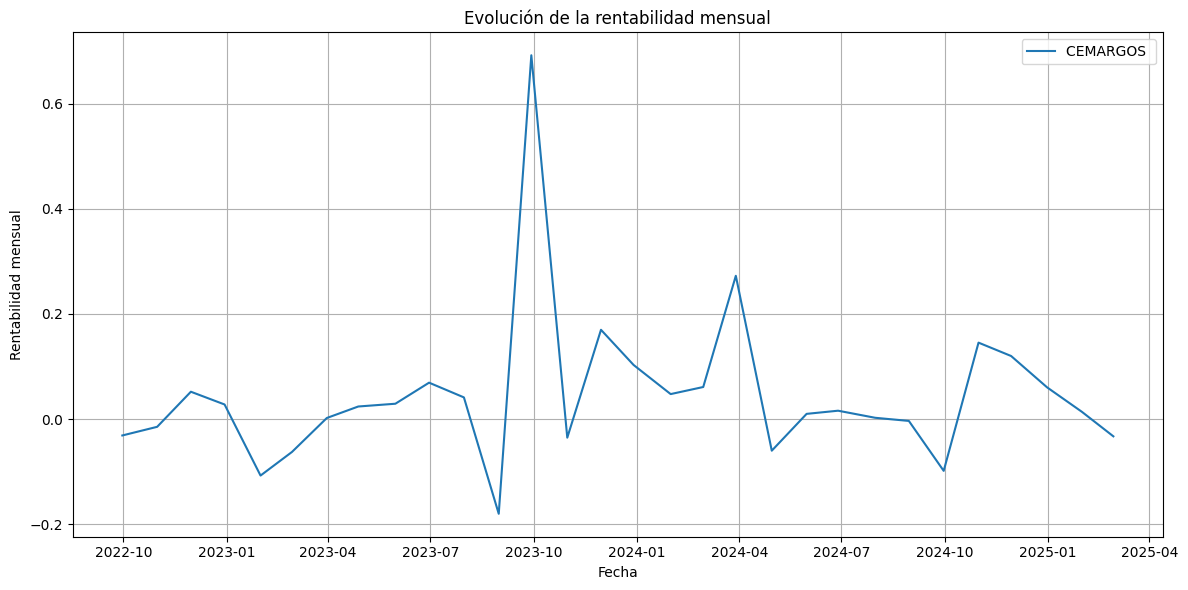

In [53]:
# Gráfico de líneas: evolución de rentabilidad mensual
plt.figure(figsize=(12, 6))

# Print columns to debug the KeyError
print(rentabilidades.columns)

for accion in acciones_seleccionadas:
    # Ensure the column name exists in rentabilidades before plotting
    if accion in rentabilidades.columns:
        plt.plot(rentabilidades.index, rentabilidades[accion], label=accion)
    else:
        print(f"Warning: Column '{accion}' not found in rentabilidades DataFrame.")

plt.title('Evolución de la rentabilidad mensual')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad mensual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

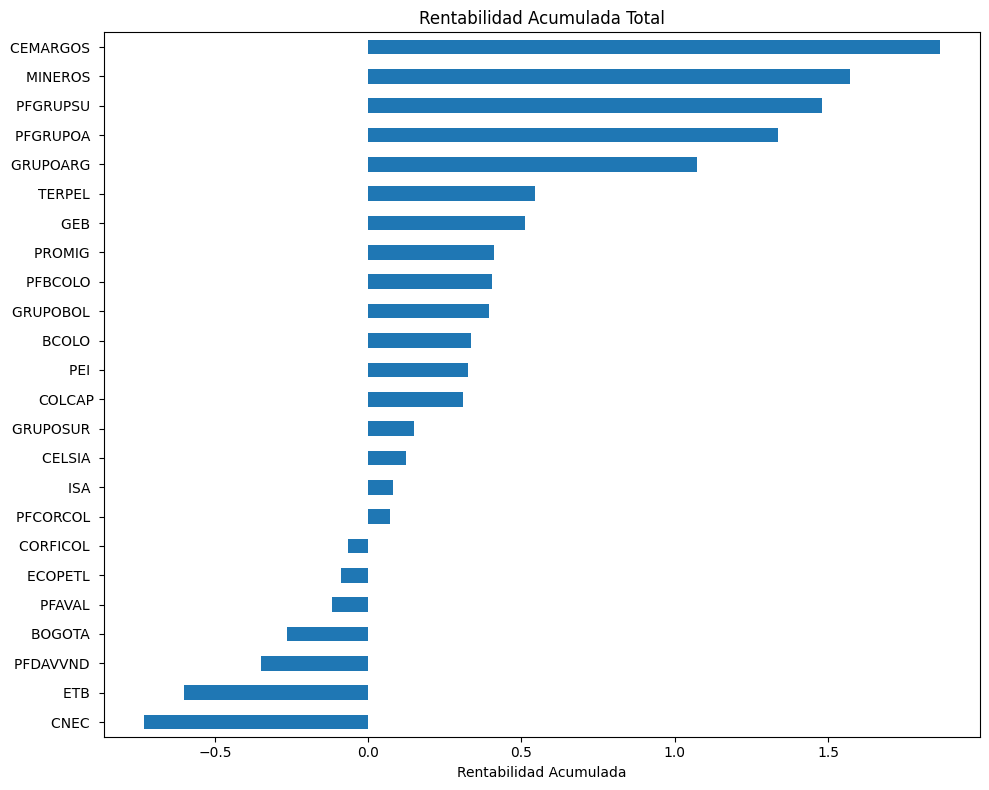

In [54]:
# Gráfico de barras: rentabilidad acumulada total
rent_agregadas['Rentabilidad Acumulada'].sort_values().plot(kind='barh', figsize=(10, 8), title='Rentabilidad Acumulada Total')
plt.xlabel('Rentabilidad Acumulada')
plt.tight_layout()
plt.show()

Nombres de las columnas en rentabilidades despues de eliminar el espacio en blanco: ['PFBCOLO', 'BCOLO', 'ECOPETL', 'ISA', 'GEB', 'CEMARGOS', 'GRUPOARG', 'PFGRUPSU', 'PFGRUPOA', 'PEI', 'PFAVAL', 'GRUPOSUR', 'PFDAVVND', 'CELSIA', 'CORFICOL', 'GRUPOBOL', 'PROMIG', 'BOGOTA', 'MINEROS', 'TERPEL', 'PFCORCOL', 'CNEC', 'ETB', 'COLCAP']


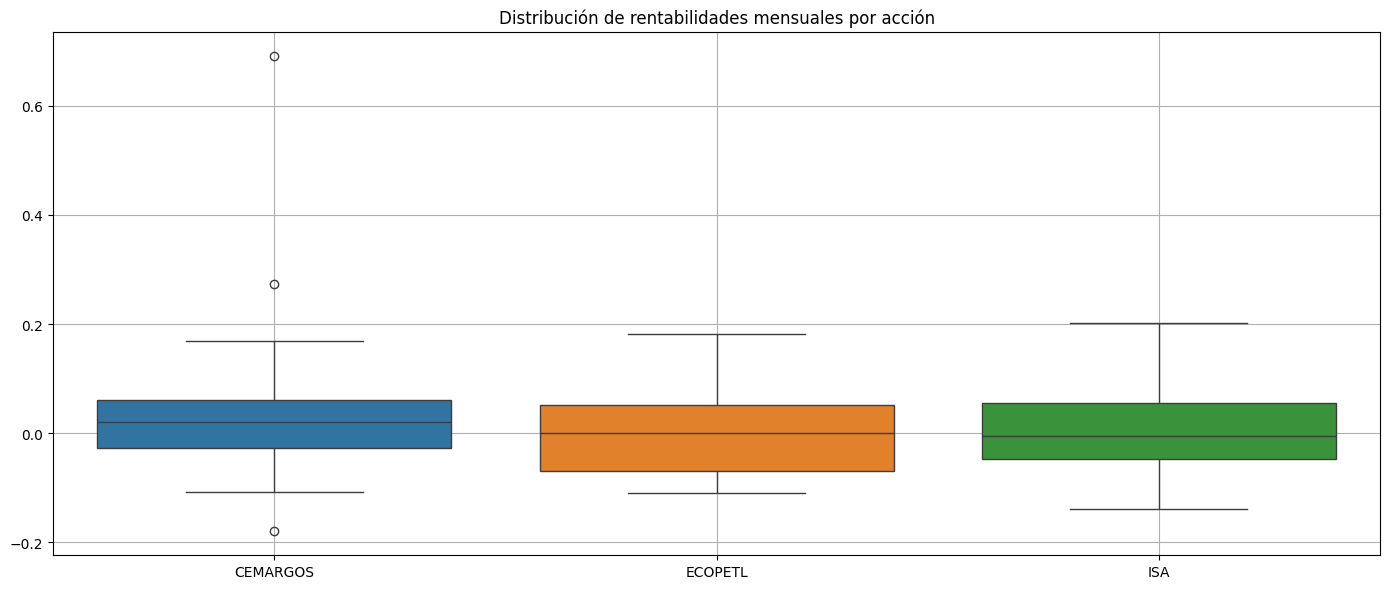

In [55]:
# Boxplot: distribución de rentabilidades por acción
plt.figure(figsize=(14, 6))

# Limpiar los nombres de las columnas en las rentabilidades quitando los espacion en blanco
rentabilidades.columns = rentabilidades.columns.str.strip()

# Actualizar la lista de acciones seleccionadas para que coincida con los posibles nombres de columna corregida
acciones_seleccionadas = ['CEMARGOS', 'ECOPETL', 'ISA'] # Corregido basado en nombres de columnas probables sin espacio final

# Imprimir los nombres de las columnas despues de la limpieza
print("Nombres de las columnas en rentabilidades despues de eliminar el espacio en blanco:", rentabilidades.columns.tolist())

# Filtrar y trazar, asegurando que las acciones seleccionadas existan despues de la limpieza
sns.boxplot(data=rentabilidades[acciones_seleccionadas])
plt.title('Distribución de rentabilidades mensuales por acción')
plt.grid(True)
plt.tight_layout()
plt.show()

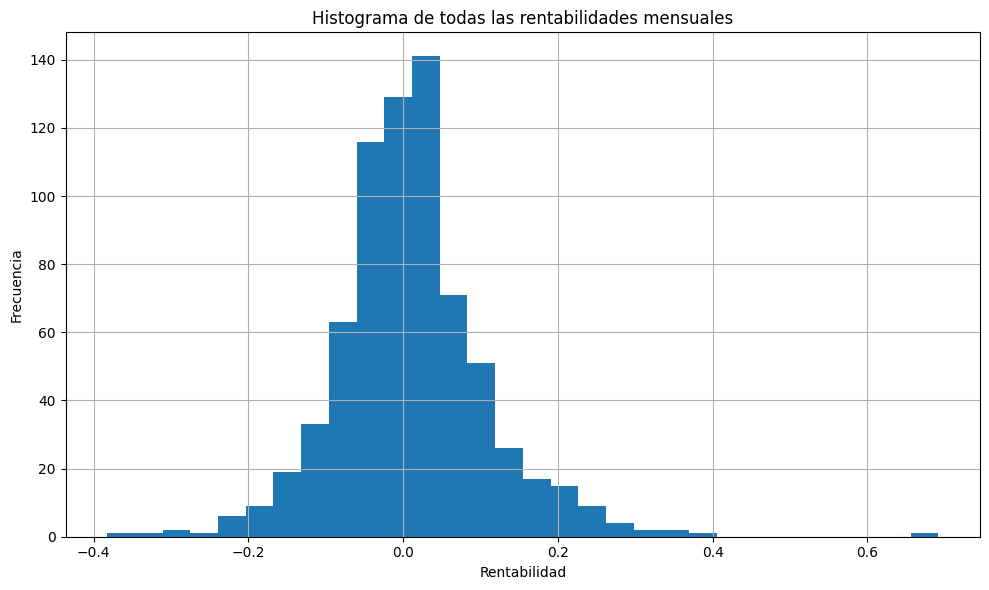

In [56]:
# Histograma: distribución de todas las rentabilidades
plt.figure(figsize=(10, 6))
rentabilidades.stack().hist(bins=30)
plt.title('Histograma de todas las rentabilidades mensuales')
plt.xlabel('Rentabilidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Diccionario con recomendaciones según perfil
recomendaciones = {
    "Agresivo (busca alta rentabilidad, acepta riesgo)": "Considerar acciones como CEMARGOS",
    "Conservador (prefiere estabilidad)": "Buscar opciones más estables (aunque menos rentables), como ISA o bonos",
    "Moderado": "Diversificar: combinar acciones de alto rendimiento con otras más estables"
}

# Crear un widget desplegable
perfil_dropdown = widgets.Dropdown(
    options=recomendaciones.keys(),
    description='Perfil:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='100%')
)

# Crear un botón
boton = widgets.Button(description="Mostrar recomendación", button_style='success')

# Salida de texto
salida = widgets.Output()

# Función al hacer clic en el botón
def mostrar_recomendacion(b):
    with salida:
        clear_output()
        perfil = perfil_dropdown.value
        print(f"📌 Recomendación para perfil '{perfil}':\n👉 {recomendaciones[perfil]}")

# Asignar acción al botón
boton.on_click(mostrar_recomendacion)

# Mostrar widgets
display(perfil_dropdown, boton, salida)


Dropdown(description='Perfil:', layout=Layout(width='100%'), options=('Agresivo (busca alta rentabilidad, acep…

Button(button_style='success', description='Mostrar recomendación', style=ButtonStyle())

Output()